In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
#import missingno as msno
plt.rcParams['figure.figsize'] = [20, 10]

In [3]:
data = pd.read_csv('top_200_instagrammers.csv')
data.head()

,Username,Channel Name,Country,Url,Main topic,Main video category,Likes,Likes Avg.,Posts,Followers,Boost Index,Comments Avg.,Views Avg.,Avg. 1 Day,Avg. 3 Day,Avg. 7 Day,Avg. 14 Day,Avg. 30 Day,Engagement Rate,Engagement Rate (60 Days)
0,cristiano,cristiano,ES,https://www.instagram.com/cristiano,Sports,Sports,2.287645e+10,8.671953e+06,3328,465027234,92,51758.330927,1.700949e+07,NaN,NaN,3321113.0,5.327340e+06,6.948659e+06,0.014916,0.015903
1,kyliejenner,kyliejenner,US,https://www.instagram.com/kyliejenner,NaN,NaN,4.304855e+10,8.296736e+06,6921,356687629,91,47534.120961,2.287547e+07,NaN,NaN,1223002.0,2.196528e+06,4.692459e+06,0.017617,0.016189
2,leomessi,leomessi,NaN,https://www.instagram.com/leomessi,NaN,NaN,4.670492e+09,6.895178e+06,875,347032978,90,47044.540305,1.176160e+07,NaN,4810554.0,3199807.0,5.359469e+06,5.668454e+06,0.015534,0.019045
3,selenagomez,selenagomez,US,https://www.instagram.com/selenagomez,NaN,NaN,8.442643e+09,6.252711e+06,1835,334551681,93,39167.115727,1.072397e+07,NaN,NaN,NaN,2.340219e+06,2.340219e+06,0.013913,0.007720
4,therock,therock,US,https://www.instagram.com/therock,NaN,NaN,9.562231e+09,1.874151e+06,6660,327064138,91,8529.747043,5.413831e+06,NaN,NaN,713970.0,1.101339e+06,1.165227e+06,0.004426,0.003723


In [4]:
data.columns = [val.lower().replace(" ", "_").replace("(", "").replace(")", "") for val in data.columns ]
data.columns

Index(['username', 'channel_name', 'country', 'url', 'main_topic',
       'main_video_category', 'likes', 'likes_avg.', 'posts', 'followers',
       'boost_index', 'comments_avg.', 'views_avg.', 'avg._1_day',
       'avg._3_day', 'avg._7_day', 'avg._14_day', 'avg._30_day',
       'engagement_rate', 'engagement_rate_60_days'],
      dtype='object')

In [5]:
data.head()

,username,channel_name,country,url,main_topic,main_video_category,likes,likes_avg.,posts,followers,boost_index,comments_avg.,views_avg.,avg._1_day,avg._3_day,avg._7_day,avg._14_day,avg._30_day,engagement_rate,engagement_rate_60_days
0,cristiano,cristiano,ES,https://www.instagram.com/cristiano,Sports,Sports,2.287645e+10,8.671953e+06,3328,465027234,92,51758.330927,1.700949e+07,NaN,NaN,3321113.0,5.327340e+06,6.948659e+06,0.014916,0.015903
1,kyliejenner,kyliejenner,US,https://www.instagram.com/kyliejenner,NaN,NaN,4.304855e+10,8.296736e+06,6921,356687629,91,47534.120961,2.287547e+07,NaN,NaN,1223002.0,2.196528e+06,4.692459e+06,0.017617,0.016189
2,leomessi,leomessi,NaN,https://www.instagram.com/leomessi,NaN,NaN,4.670492e+09,6.895178e+06,875,347032978,90,47044.540305,1.176160e+07,NaN,4810554.0,3199807.0,5.359469e+06,5.668454e+06,0.015534,0.019045
3,selenagomez,selenagomez,US,https://www.instagram.com/selenagomez,NaN,NaN,8.442643e+09,6.252711e+06,1835,334551681,93,39167.115727,1.072397e+07,NaN,NaN,NaN,2.340219e+06,2.340219e+06,0.013913,0.007720
4,therock,therock,US,https://www.instagram.com/therock,NaN,NaN,9.562231e+09,1.874151e+06,6660,327064138,91,8529.747043,5.413831e+06,NaN,NaN,713970.0,1.101339e+06,1.165227e+06,0.004426,0.003723


In [6]:
print("Unique username",data.username.unique())
print("No. of Unique username",len(data.username.unique()))

Unique username ['cristiano' 'kyliejenner' 'leomessi' 'selenagomez' 'therock'
 'kimkardashian' 'arianagrande' 'beyonce' 'khloekardashian'
 'kendalljenner' 'justinbieber' 'natgeo' 'nike' 'taylorswift' 'jlo'
 'virat.kohli' 'nickiminaj' 'kourtneykardash' 'mileycyrus' 'neymarjr'
 'katyperry' 'kevinhart4real' 'zendaya' 'iamcardib' 'ddlovato'
 'badgalriri' 'kingjames' 'theellenshow' 'realmadrid' 'champagnepapi'
 'chrisbrownofficial' 'fcbarcelona' 'billieeilish' 'dualipa' 'gal_gadot'
 'vindiesel' 'priyankachopra' 'lalalalisa_m' 'nasa' 'shakira' 'gigihadid'
 'snoopdogg' 'davidbeckham' 'shraddhakapoor' 'victoriassecret' 'k.mbappe'
 'nehakakkar' 'shawnmendes' 'nba' 'narendramodi' 'jennierubyjane'
 'deepikapadukone' 'tomholland2013' 'aliaabhatt' 'ronaldinho' 'emmawatson'
 'bts.bighitofficial' 'katrinakaif' 'justintimberlake' 'marvel'
 'camila_cabello' 'willsmith' 'raffinagita1717' 'anitta' 'maluma'
 'akshaykumar' 'jacquelinef143' 'sooyaaa__' 'psg' 'roses_are_rosie'
 'anushkasharma' 'manchesteruni

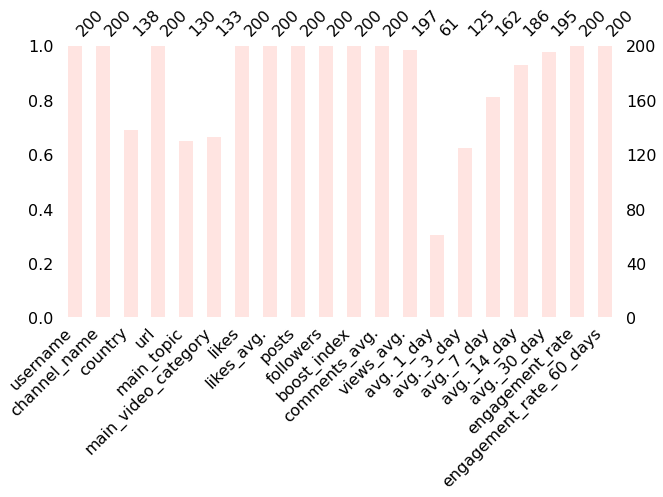

In [7]:
import missingno as msno
msno.bar(data, figsize = (10,5),color = "#FFE4E1")
plt.show()

In [8]:
for column_name in data.columns:
    unique_values = len(data[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'username' has '200' unique values
Feature 'channel_name' has '200' unique values
Feature 'country' has '26' unique values
Feature 'url' has '200' unique values
Feature 'main_topic' has '19' unique values
Feature 'main_video_category' has '20' unique values
Feature 'likes' has '200' unique values
Feature 'likes_avg.' has '200' unique values
Feature 'posts' has '197' unique values
Feature 'followers' has '200' unique values
Feature 'boost_index' has '32' unique values
Feature 'comments_avg.' has '200' unique values
Feature 'views_avg.' has '198' unique values
Feature 'avg._1_day' has '55' unique values
Feature 'avg._3_day' has '119' unique values
Feature 'avg._7_day' has '156' unique values
Feature 'avg._14_day' has '180' unique values
Feature 'avg._30_day' has '189' unique values
Feature 'engagement_rate' has '200' unique values
Feature 'engagement_rate_60_days' has '200' unique values


In [9]:
country_df = data.country.value_counts().rename_axis('Country').reset_index(name='counts')
country_df

,Country,counts
0,US,67
1,BR,13
2,IN,12
3,FR,6
4,ID,6
5,ES,5
6,GB,4
7,CO,3
8,CA,3
9,NL,2


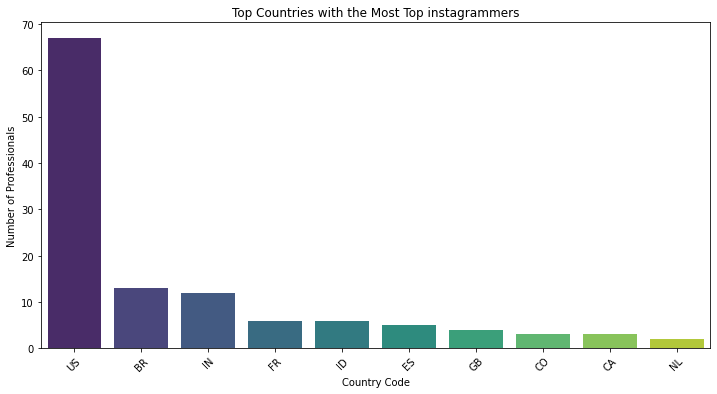

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Country", y="counts", data=country_df.head(10), palette='viridis')
plt.title('Top Countries with the Most Top instagrammers')
plt.xlabel('Country Code')
plt.ylabel('Number of Professionals')
plt.xticks(rotation=45)
plt.show()

In [52]:
print("No. of null values in main_topic",len(data.main_topic.isnull()))

#Replacing Null values with others
data["main_topic"] = data["main_topic"].replace(0, 'Others')
data["main_topic"].value_counts(dropna=False)

No. of null values in main_topic 200


NaN                      70
Entertainment            22
Sports                   21
Gaming                   14
Music                    13
Trailers                  9
Fashion & Beauty          7
Movies                    6
Comedy                    6
Pets & Animals            5
Autos & Vehicles          5
Travel & Events           4
Education                 4
Nonprofits & Activism     4
Shows                     3
Science & Technology      2
Film & Animation          2
News & Politics           2
People & Blogs            1
Name: main_topic, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


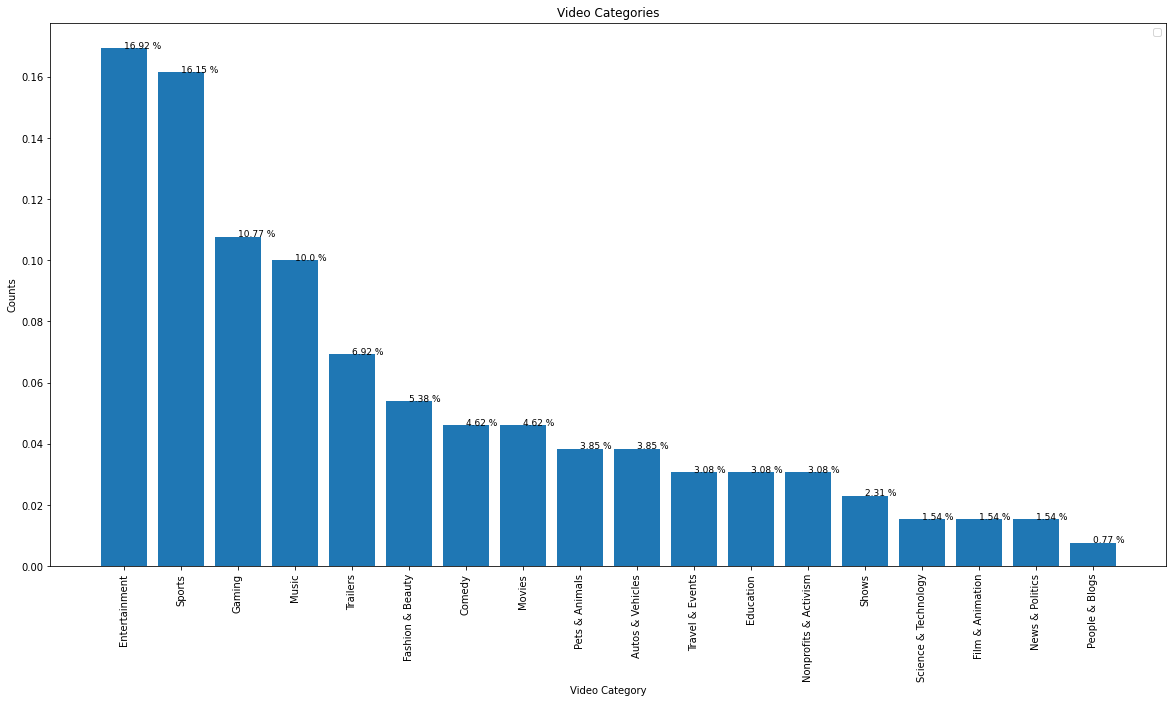

In [53]:
#Plotting the distriburing of main_Topic in dataset

entertainment_vc = data.main_topic.value_counts(normalize=True)

def plot_bar_for_vc(vc_object, xlabel, ylabel, title, rot=0):
    plt.bar(
    x=vc_object.index,
    height=vc_object.values)
    for index,value in vc_object.items():
        plt.text(x=index , y =value , s=f"{round(value*100, 2)} %" , fontdict=dict(fontsize=9))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation = rot)
    plt.title(title)
    plt.legend()
    plt.show()
plot_bar_for_vc(entertainment_vc, 'Video Category', 'Counts', 'Video Categories', 90)

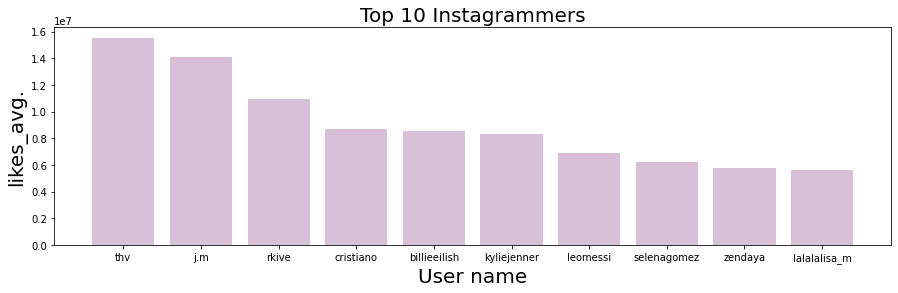

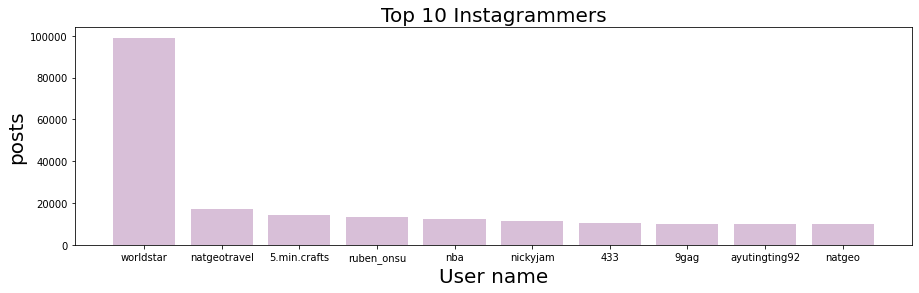

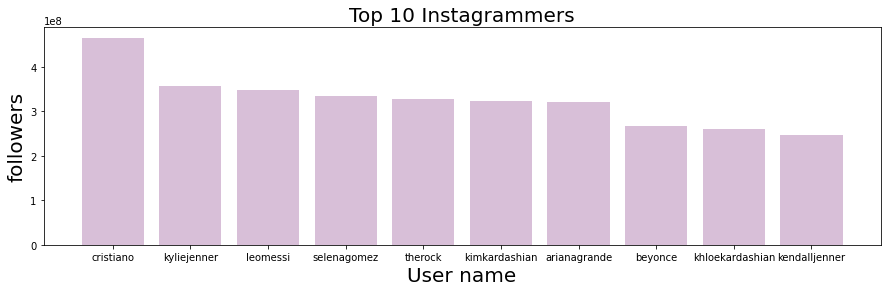

In [66]:
num_features=['likes_avg.', 'posts','followers']

for column in num_features:
    top10 = data.nlargest(10,column)
    plt.figure(figsize=(15,4))
    plt.bar(top10['username'], top10[column],color='#D8BFD8')
    plt.ylabel(column, fontsize = 20)
    plt.xlabel("User name", fontsize = 20)
    plt.title("Top 10 Instagrammers", fontsize = 20)

In [55]:
# Sort by likes and get the top three usernames
top_likes = data.sort_values(by='likes', ascending=False).head(3)['username']

# Sort by posts and get the top three usernames
top_posts = data.sort_values(by='posts', ascending=False).head(3)['username']

# Sort by followers and get the top three usernames
top_followers = data.sort_values(by='followers', ascending=False).head(3)['username']

print("Top three usernames by likes:\n", top_likes)
print("Top three usernames by posts:\n", top_posts)
print("Top three usernames by followers:\n", top_followers)

Top three usernames by likes:
 1      kyliejenner
0        cristiano
5    kimkardashian
Name: username, dtype: object
Top three usernames by posts:
 161       worldstar
123    natgeotravel
113    5.min.crafts
Name: username, dtype: object
Top three usernames by followers:
 0      cristiano
1    kyliejenner
2       leomessi
Name: username, dtype: object


In [ ]:
https://www.kaggle.com/code/syedjaferk/top-200-instagrammers-a-simple-eda